In [1]:
!pip install folium

In [2]:
!pip install yfinance

In [65]:

import pandas as pd

import datetime

import numpy as np

import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

#Importing the Libraries
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras. layers import LSTM, Dense, Dropout, Activation
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn. preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model
import tensorflow as tf




In [2]:
import yfinance as yf
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")
hist.head()
hist1 = hist.drop("Volume", axis=1)
hist1 = hist1.drop("Dividends", axis=1)
hist1 = hist1.drop("Stock Splits", axis=1)

hist1.head()

Open      High       Low     Close
Date                                              
1986-03-13  0.055783  0.063987  0.055783  0.061252
1986-03-14  0.061252  0.064533  0.061252  0.063439
1986-03-17  0.063439  0.065080  0.063439  0.064533
1986-03-18  0.064533  0.065080  0.062345  0.062892
1986-03-19  0.062892  0.063439  0.061252  0.061799

In [3]:

start = "2014-01-01"
end = '2019-1-01'
tcs = yf.download('AAPL',start,end)
infy = yf.download('INFY',start,end)
wipro = yf.download('WIPRO.NS',start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


NameError: name 'plt' is not defined

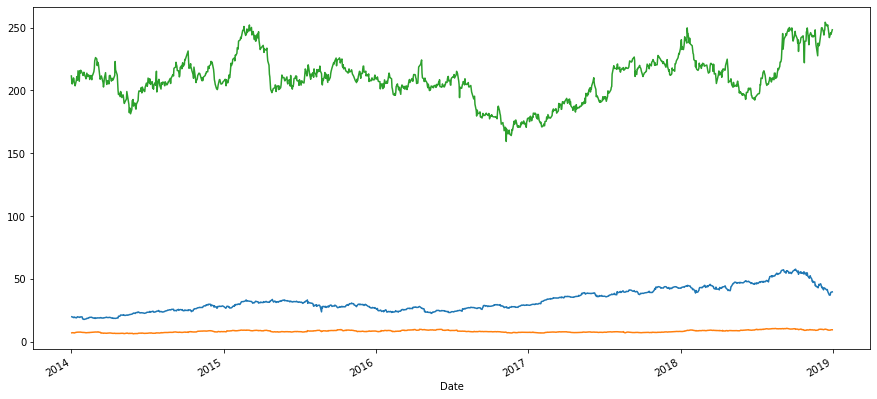

In [4]:
tcs['Open'].plot(label = 'TCS', figsize = (15,7))
infy['Open'].plot(label = "Infosys")
wipro['Open'].plot(label = 'Wipro')
plt.title('Stock Prices of TCS, Infosys and Wipro')

Volume of Stock Traded

In [ ]:
tcs['Volume'].plot(label = 'TCS', figsize = (15,7))
infy['Volume'].plot(label = "Infosys")
wipro['Volume'].plot(label = 'Wipro')
plt.title('Volume of Stock traded')
plt.legend()



To observe any trend or pattern we can take the help of a 50-day 200-day average

In [ ]:
tcs['MA50'] = tcs['Open'].rolling(50).mean()
tcs['MA200'] = tcs['Open'].rolling(200).mean()
tcs['Open'].plot(figsize = (15,7))
tcs['MA50'].plot()
tcs['MA200'].plot()

Scattered plot matrix

In [5]:
data = pd.concat([tcs['Open'],infy['Open'],wipro['Open']],axis = 1)
data.columns = ['TCSOpen','InfosysOpen','WiproOpen']
scatter_matrix(data, figsize = (8,8), hist_kwds= {'bins':250})

NameError: name 'scatter_matrix' is not defined

Percentage increase in stock value

NameError: name 'plt' is not defined

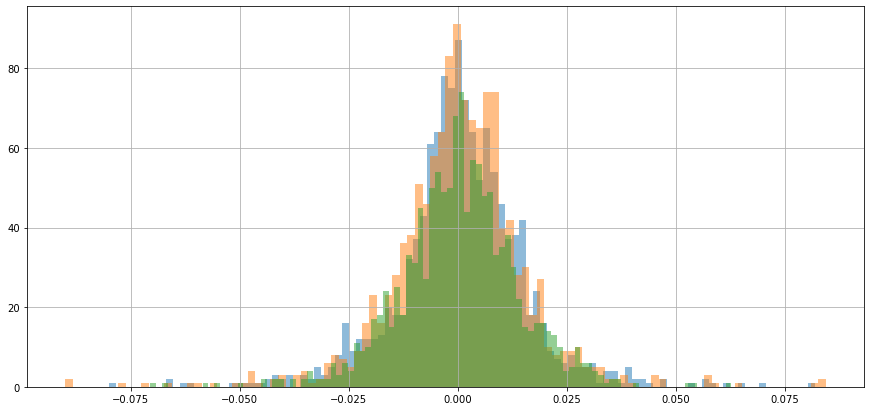

In [6]:
#Volatility
tcs['returns'] = (tcs['Close']/tcs['Close'].shift(1)) -1
infy['returns'] = (infy['Close']/infy['Close'].shift(1))-1
wipro['returns'] = (wipro['Close']/wipro['Close'].shift(1)) - 1
tcs['returns'].hist(bins = 100, label = 'TCS', alpha = 0.5, figsize = (15,7))
infy['returns'].hist(bins = 100, label = 'Infosysy', alpha = 0.5)
wipro['returns'].hist(bins = 100, label = 'Wipro', alpha = 0.5)
plt.legend()

In [7]:
import plotly.graph_objects as go
import pandas as pd

df = hist1

df.reset_index(inplace=True)

fig = go.Figure(data=go.Ohlc(x= df['Date'],
                    open=df['Open'],
                    high=df['High'],
                    low=df['Low'],
                    close=df['Close']))
fig.show()

In [31]:
start = "2014-01-01"
end = '2019-1-01'
df = yf.download('AAPL',start,end)

[*********************100%***********************]  1 of 1 completed


Check for Null Values: We check for null values in the data frame to ensure that there are none. The existence of null values in the dataset causes issues during training since they function as outliers, creating a wide variance in the training process.

In [32]:
#Print the shape of Dataframe  and Check for Null Values
print('Dataframe Shape: ', df.shape)
print('Null Value Present:', df.isna().any())

Dataframe Shape:  (1258, 6)
Null Value Present: Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2014-01-02 to 2018-12-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


The Adjusted Close Value is the final output value that will be forecasted using the Machine Learning model.

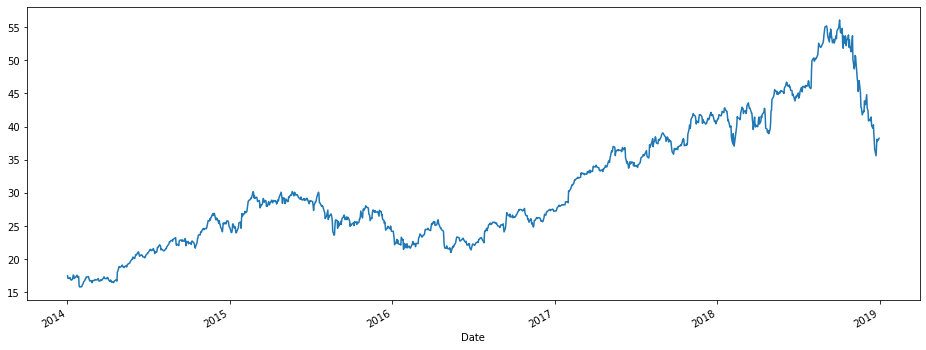

In [34]:
#Plot the True Adj Close Value

plt.figure(figsize=(16,6))
df['Adj Close'].plot()



Setting the Target Variable and Selecting the Features

In [35]:
#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
df1= output_var
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

Scaling

In [36]:
#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

Open      High       Low    Volume
Date                                              
2014-01-02  0.054004  0.048995  0.052444  0.185149
2014-01-03  0.051487  0.046056  0.042048  0.339895
2014-01-06  0.037732  0.039964  0.035922  0.359651
2014-01-07  0.043864  0.039223  0.039797  0.266085
2014-01-08  0.038946  0.038870  0.040488  0.208535

Creating a Training Set and a Test Set for Stock Market Prediction

In [37]:
#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

Data Processing For LSTM

In [38]:
#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

Building the LSTM Model for Stock Market Prediction

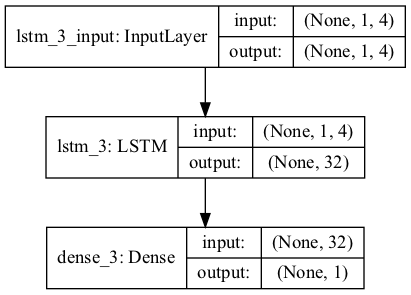

In [39]:
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam',metrics = [tf.keras.metrics.RootMeanSquaredError()])
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [46]:
lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 32)                4736      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 4,769
Trainable params: 4,769
Non-trainable params: 0
_________________________________________________________________


Compiling the lstm model

In [47]:
lstm.compile(loss='mean_squared_error', optimizer='adam',metrics = [tf.keras.metrics.RootMeanSquaredError()])

Training the Stock Market Prediction Model

In [48]:
lstm.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'mse', metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [49]:
history1 = lstm.fit(X_train, y_train, epochs = 100, validation_data = (X_test, y_test),batch_size=8, verbose=1, shuffle=False)



Train on 1144 samples, validate on 114 samples
Epoch 1/100
1144/1144 [==============================] - 2s 2ms/step - loss: 862.6383 - root_mean_squared_error: 23.4914 - val_loss: 2211.2288 - val_root_mean_squared_error: 30.6429
Epoch 2/100
1144/1144 [==============================] - 1s 486us/step - loss: 754.1748 - root_mean_squared_error: 29.3735 - val_loss: 1723.5605 - val_root_mean_squared_error: 29.9858
Epoch 3/100
1144/1144 [==============================] - 1s 605us/step - loss: 550.5065 - root_mean_squared_error: 28.8087 - val_loss: 1005.8212 - val_root_mean_squared_error: 28.3614
Epoch 4/100
1144/1144 [==============================] - 1s 450us/step - loss: 305.5171 - root_mean_squared_error: 27.1541 - val_loss: 385.0240 - val_root_mean_squared_error: 26.1931
Epoch 5/100
1144/1144 [==============================] - 1s 489us/step - loss: 119.3844 - root_mean_squared_error: 25.0220 - val_loss: 73.7418 - val_root_mean_squared_error: 23.9448
Epoch 6/100
1144/1144 [===============

1144/1144 [==============================] - 1s 829us/step - loss: 0.1043 - root_mean_squared_error: 5.6865 - val_loss: 0.2558 - val_root_mean_squared_error: 5.6710
Epoch 93/100
1144/1144 [==============================] - 1s 906us/step - loss: 0.1042 - root_mean_squared_error: 5.6558 - val_loss: 0.2555 - val_root_mean_squared_error: 5.6406
Epoch 94/100
1144/1144 [==============================] - 1s 741us/step - loss: 0.1042 - root_mean_squared_error: 5.6256 - val_loss: 0.2552 - val_root_mean_squared_error: 5.6106
Epoch 95/100
1144/1144 [==============================] - 1s 744us/step - loss: 0.1042 - root_mean_squared_error: 5.5958 - val_loss: 0.2549 - val_root_mean_squared_error: 5.5811
Epoch 96/100
1144/1144 [==============================] - 1s 872us/step - loss: 0.1042 - root_mean_squared_error: 5.5666 - val_loss: 0.2547 - val_root_mean_squared_error: 5.5520
Epoch 97/100
1144/1144 [==============================] - 1s 784us/step - loss: 0.1042 - root_mean_squared_error: 5.5377 - 

LSTM Prediction

In [50]:
y_pred= lstm.predict(X_test)

Comparing Predicted vs True Adjusted Close Value – LSTM

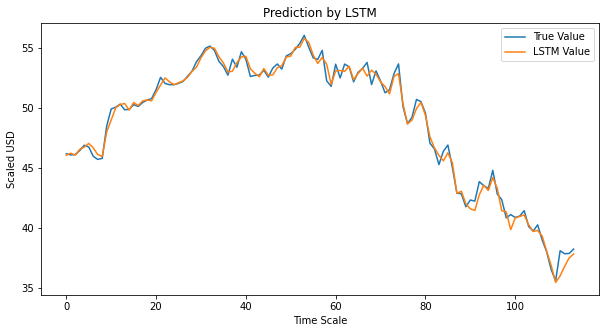

In [51]:
#Predicted vs True Adj Close Value – LSTM
plt.figure(figsize=(10,5))

plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()

In [53]:
history_dict = history1.history
history_dict

loss = history_dict["loss"]
root_mean_squared_error = history_dict["root_mean_squared_error"]
val_loss = history_dict["val_loss"]
val_root_mean_squared_error = history_dict["val_root_mean_squared_error"]
epochs = range(1, len(loss) + 1)

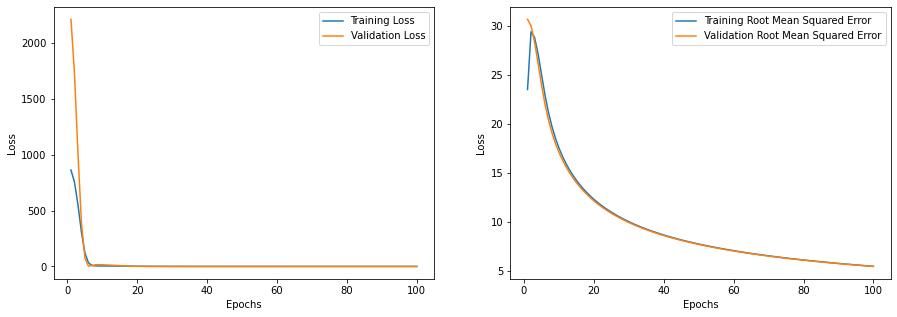

In [54]:
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figheight(5)
fig.set_figwidth(15)

ax1.plot(epochs, loss, label = 'Training Loss')
ax1.plot(epochs, val_loss, label = 'Validation Loss')
ax1.set(xlabel = "Epochs", ylabel = "Loss")
ax1.legend()

ax2.plot(epochs, root_mean_squared_error, label = "Training Root Mean Squared Error")
ax2.plot(epochs, val_root_mean_squared_error, label = "Validation Root Mean Squared Error")
ax2.set(xlabel = "Epochs", ylabel = "Loss")
ax2.legend()

plt.show()

In [63]:
rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 7.611949630144945
MAPE: 0.12687066748353729
